# Import Libraries

In [1]:
import pandas as pd # library for open files
import numpy as np # Library for mathematical operations
import matplotlib.pyplot as plt # Library for graph
import seaborn as sns # Library for graph

from sklearn.model_selection import train_test_split # to split data for training & testing
from sklearn.svm import SVC # to use SVM to make classification
from sklearn.preprocessing import scale # to scale data to make it closer between 0 & 1
from sklearn.metrics import accuracy_score # to get the accuracy score

# Load Data

In [2]:
#                              Path                                               File Name   Extension
train_path = r'D:\Abdulrhman Osama\Machine Learning Projects\MNIST Classification\mnist_train.csv'

#                              Path                                              File Name   Extension
test_path = r'D:\Abdulrhman Osama\Machine Learning Projects\MNIST Classification\mnist_test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [3]:
print('Train Data Frame:')
train_df.head(10) # show the first ten rows from the data

Train Data Frame:


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print('Test Data Frame:')
test_df.head(10) # show the first ten rows from the data

Test Data Frame:


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.shape # Show the number of rows & columns

(60000, 785)

In [6]:
test_df.shape # Show the number of rows & columns

(10000, 785)

# Cleaning Data

In [7]:
train_df.isnull().sum() # Check if there any empty slots in the data or any nulls or not

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [8]:
test_df.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [9]:
train_df.describe().T # describe the data by the minimum, maximum, the number of it, mean, standard deviation, etc...

,count,mean,std,min,25%,50%,75%,max
label,60000.0,4.453933,2.88927,0.0,2.0,4.0,7.0,9.0
1x1,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x2,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x3,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x4,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
28x24,60000.0,0.002000,0.34660,0.0,0.0,0.0,0.0,62.0
28x25,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
28x26,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
28x27,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [10]:
test_df.describe().T # describe the data by the minimum, maximum, the number of it, mean, standard deviation, etc...

,count,mean,std,min,25%,50%,75%,max
label,10000.0,4.4434,2.895865,0.0,2.0,4.0,7.0,9.0
1x1,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
1x2,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
1x3,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
1x4,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
28x24,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
28x25,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
28x26,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
28x27,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0


In [11]:
test_df.drop('label', axis = 1, inplace = True) # Drop the 'label' column

In [12]:
train_df.info() # Gives information about the data (string, integer, float, etc...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [13]:
test_df.info() # Gives information about the data (string, integer, float, etc...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, 1x1 to 28x28
dtypes: int64(784)
memory usage: 59.8 MB


In [14]:
train_df.columns # Show all columns in the data frame

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [15]:
test_df.columns # Show all columns in the data frame

Index(['1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '1x10',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=784)

In [16]:
train_df.shape # Show the number of rows & columns

(60000, 785)

In [17]:
test_df.shape # Show the number of rows & columns

(10000, 784)

In [18]:
order = list(np.sort(train_df['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Data Analysis

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

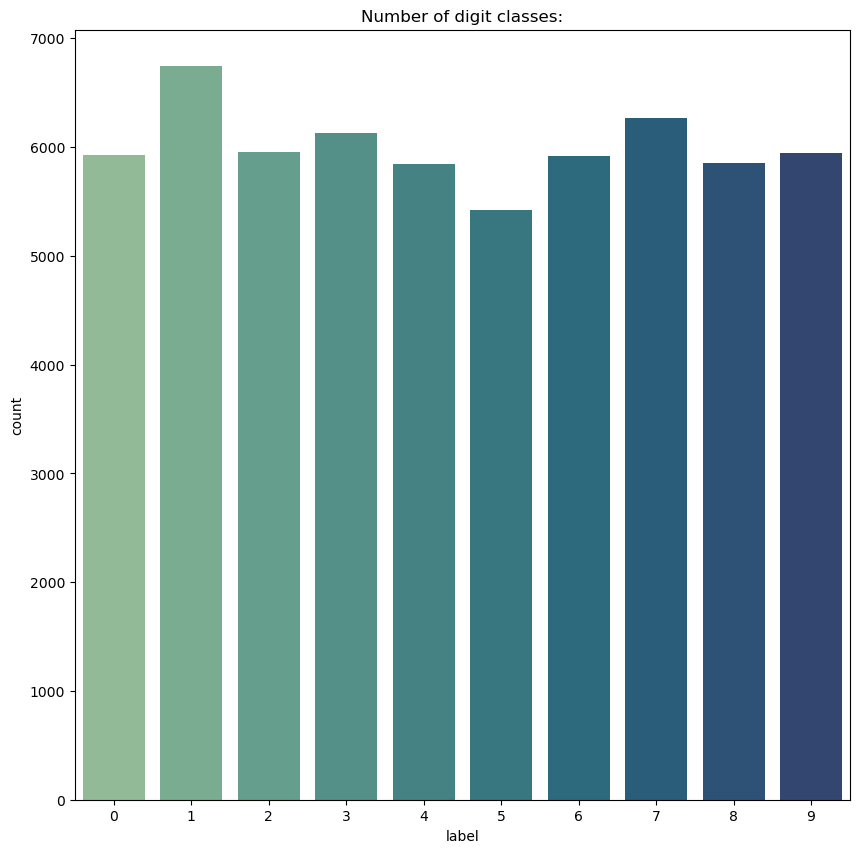

In [19]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'label', palette = 'crest', data = train_df)
plt.title('Number of digit classes:')
train_df['label'].value_counts()

(784,)


Text(0.5, 1.0, 'Digit 0')

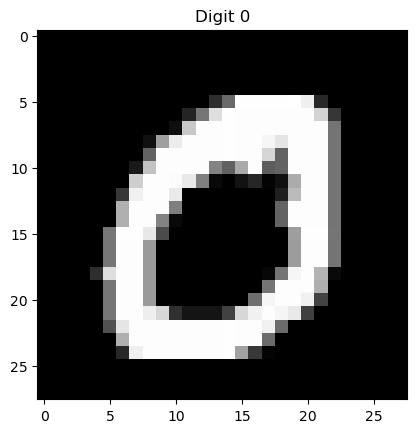

In [20]:
zero = train_df.iloc[51, 1:]
print(zero.shape)

zero = zero.values.reshape(28, 28)
plt.imshow(zero, cmap = 'gray')
plt.title('Digit 0')

(784,)


Text(0.5, 1.0, 'Digit 1')

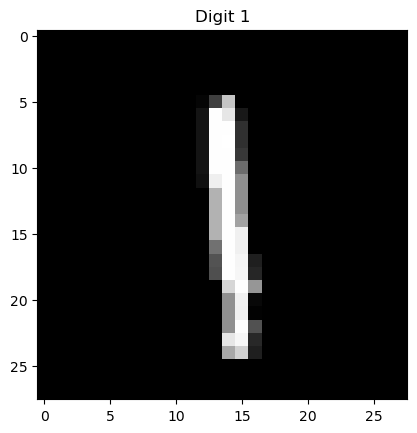

In [21]:
one = train_df.iloc[8, 1:]
print(one.shape)

one = one.values.reshape(28, 28)
plt.imshow(one, cmap = 'gray')
plt.title('Digit 1')

(784,)


Text(0.5, 1.0, 'Digit 2')

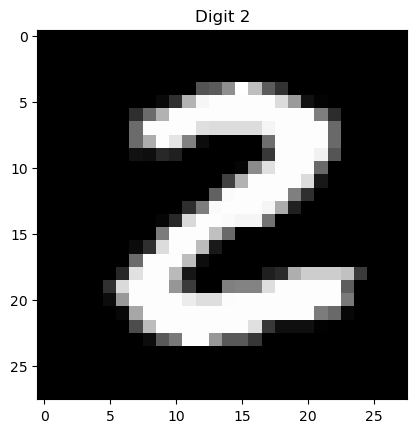

In [22]:
two = train_df.iloc[25, 1:]
print(two.shape)

two = two.values.reshape(28, 28)
plt.imshow(two, cmap = 'gray')
plt.title('Digit 2')

(784,)


Text(0.5, 1.0, 'Digit 3')

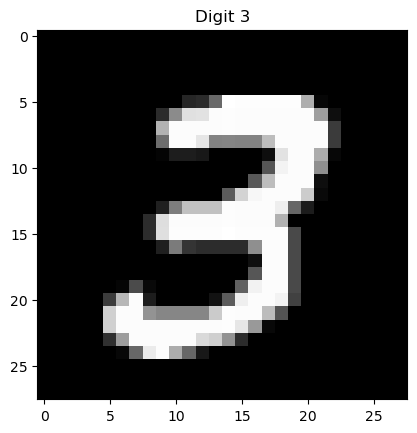

In [23]:
three = train_df.iloc[7, 1:]
print(three.shape)

three = three.values.reshape(28, 28)
plt.imshow(three, cmap = 'gray')
plt.title('Digit 3')

(784,)


Text(0.5, 1.0, 'Digit 4')

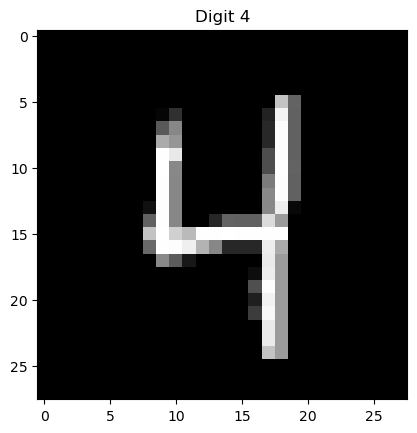

In [24]:
four = train_df.iloc[92, 1:]
print(four.shape)

four = four.values.reshape(28, 28)
plt.imshow(four, cmap = 'gray')
plt.title('Digit 4')

(784,)


Text(0.5, 1.0, 'Digit 5')

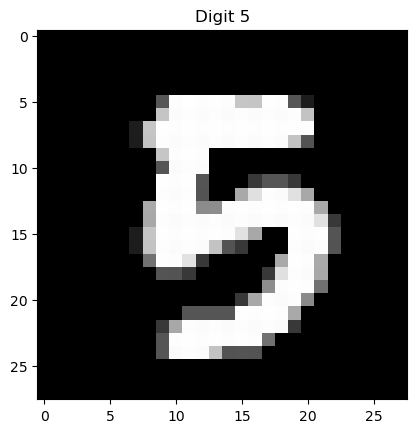

In [25]:
five = train_df.iloc[244, 1:]
print(five.shape)

five = five.values.reshape(28, 28)
plt.imshow(five, cmap = 'gray')
plt.title('Digit 5')

(784,)


Text(0.5, 1.0, 'Digit 6')

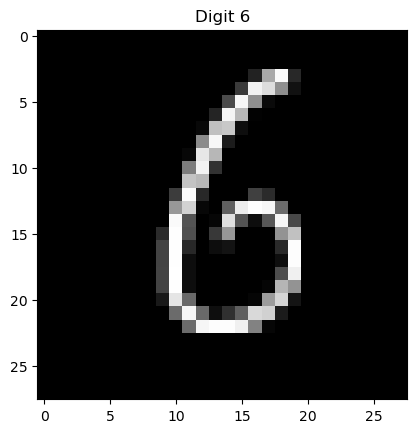

In [26]:
six = train_df.iloc[18, 1:]
print(six.shape)

six = six.values.reshape(28, 28)
plt.imshow(six, cmap = 'gray')
plt.title('Digit 6')

(784,)


Text(0.5, 1.0, 'Digit 7')

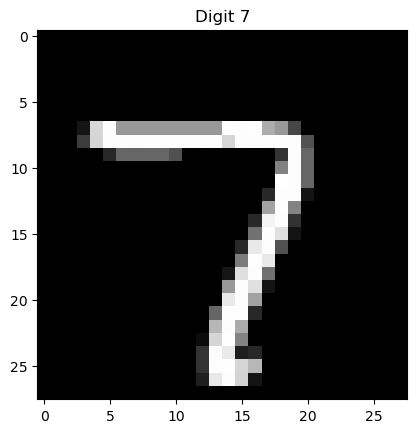

In [27]:
seven = train_df.iloc[84, 1:]
print(seven.shape)

seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap = 'gray')
plt.title('Digit 7')

(784,)


Text(0.5, 1.0, 'Digit 8')

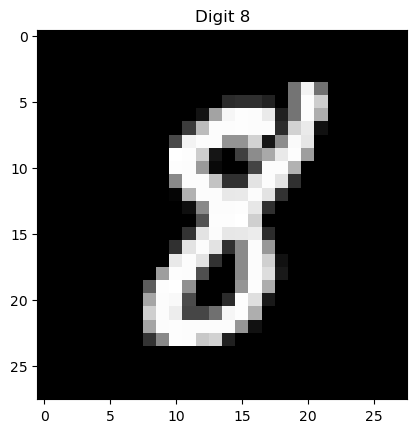

In [28]:
eight = train_df.iloc[41, 1:]
print(eight.shape)

eight = eight.values.reshape(28, 28)
plt.imshow(eight, cmap = 'gray')
plt.title('Digit 8')

(784,)


Text(0.5, 1.0, 'Digit 9')

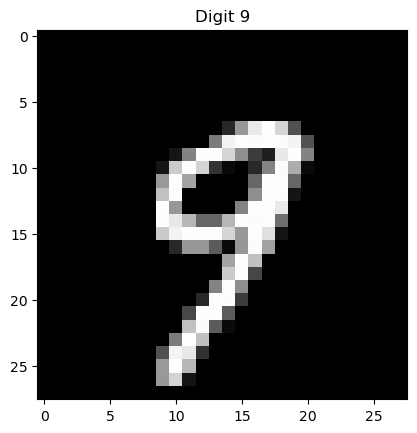

In [29]:
nine = train_df.iloc[57, 1:]
print(nine.shape)

nine = nine.values.reshape(28, 28)
plt.imshow(nine, cmap = 'gray')
plt.title('Digit 9')

# Split Data

In [30]:
X = train_df.drop('label', axis = 1)
Y = train_df['label']

In [31]:
X.shape

(60000, 784)

In [32]:
Y.shape

(60000,)

# Normalization

In [33]:
X = X / 255.0
test_df = test_df / 255.0

print('X:', X.shape)
print('Test Data:', test_df.shape)

X: (60000, 784)
Test Data: (10000, 784)


# Data Scaling

In [34]:
X_scaled = scale(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 10, shuffle = True)

In [35]:
Model_Linear = SVC(kernel = 'linear')
Model_Linear.fit(X_train, Y_train)

Y_pred = Model_Linear.predict(X_test)

In [36]:
Accuracy = round(accuracy_score(y_true = Y_test, y_pred = Y_pred), 2) * 100

print(f'Accuracy: {Accuracy}%')

Accuracy: 92.0%


# Thank You

# Eng. Abdulrhman Osama